# 6장. 머신러닝 모형 최적화
## 1절 . 변수 선택과 차원 축소

- 상관관계를 알아보는 이유는, 다중공성성(독립변수간의 관계)이 있는지, 종속변수와 독립변수의 관계를 확인하기 위해서 찾음.
- 차원축소 : 빨리/정확하게 하기 위해서 차원축소를 하는데 성능이 떨어지면 할 필요 없음 

### 1.1. 주성분 분석 
- 빠르게 하기위해서 주성분 분석을 하는 것이다 . 차원을 줄인다고 하는데, 사실 줄여지는 것은 아니다. 


In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
import pandas as pd
redwine = pd.read_csv("winequality-red.csv", sep=";")

In [43]:
from sklearn.decomposition import PCA
pca = PCA()

#  n_components= <몇개의 주성분을 뽑아 낼거냐 라는 의미

In [44]:
pca = PCA(2)  # 2개의 주성분만 뽑아 낸다 라는 의미

In [45]:
redwine_pca = pca.fit_transform(redwine.iloc[:,:-1],redwine.iloc[:, -1]) # 학습과 주성분을 뽑아내는 것 함께

In [46]:
redwine_pca.shape

(1599, 2)

In [47]:
pd.DataFrame(redwine_pca).head()

,0,1
0,-13.224905,-2.023900
1,22.037724,4.408322
2,7.162673,-2.501461
3,13.430063,-1.951122
4,-13.224905,-2.023900


In [48]:
red_pca = pd.concat((pd.DataFrame(redwine_pca), redwine.iloc[:,-1]), axis = 1)
red_pca

,0,1,quality
0,-13.224905,-2.023900,5
1,22.037724,4.408322,5
2,7.162673,-2.501461,5
3,13.430063,-1.951122,6
4,-13.224905,-2.023900,5
...,...,...,...
1594,1.129111,16.313102,5
1595,9.489984,21.627525,6
1596,-3.431354,14.271243,6
1597,1.132878,16.316167,5


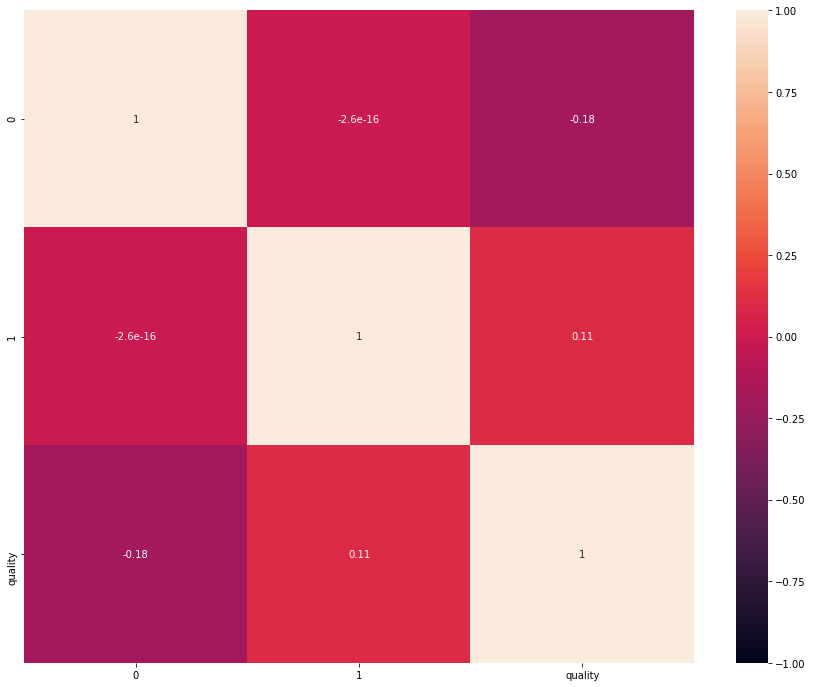

In [56]:
plt.figure(figsize = (15,12))
sns.heatmap(red_pca.corr(), vmin=-1, vmax=1, annot = True)
plt.show()

In [50]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators= 100)

from sklearn.model_selection import train_test_split
train_X, test_X, train_Y,test_Y = train_test_split(redwine_pca, redwine.iloc[:,-1], test_size = 0.3)

model.fit(train_X, train_Y)
pred = model.predict(test_X)

In [51]:
pd.crosstab(test_Y, pred)

# 주성분 두개를 가지고 두개만큼 모형을 만들고 예측을 하는것. 

col_0,3,4,5,6,7,8
quality,,,,,,
3,0,0,1,0,1,0
4,1,1,6,5,2,1
5,0,0,132,64,14,1
6,0,2,64,111,11,1
7,1,1,18,16,20,0
8,0,0,3,0,2,1


In [52]:
model.score(test_X, test_Y)  # 정확도가 나옴. 

0.5520833333333334

차원을 줄이는 여러가지 방법중에서 , 주성분 분석이 있다. 
pca 를 사용하면 매우 편리하게 할 수 있긴하다. 
아니면 책에 있는것처럼 복잡시리게 해야한다 .

#### 연습 , 아이리스 데이터를 가지고 주성분 분석을 하기.

- 원래 아이리스 데이터의 독립변수는 4개이지만 주성분만 가지고 할 수 있음. 

In [144]:
iris  = sns.load_dataset("iris")
pca = PCA(2) # 앞에는 이미 어떤 값을 가지고 있기 때문에 새로 만들어 준다.
# 숫자 안넣어주면 독립변수 갯수만큼 넣어준다. 

iris_pca = pca.fit_transform(iris.iloc[:,:-1 ], iris.species)
iris_pca.shape

train_X,test_X, train_Y, test_Y = train_test_split(iris_pca, iris.species, test_size=0.3)

In [145]:
from sklearn.svm import SVC
model = SVC()
model.fit(train_X,train_Y)
pred = model.predict(test_X)
pd.crosstab(test_Y, pred)
model.score(test_X, test_Y)

0.9555555555555556

### 1.3. 분류모형의 변수 선택

#### 1) 데이터 불러오기

In [146]:
import pandas as pd
redwine = pd.read_csv("winequality-red.csv", sep=";")
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [147]:
X = redwine.iloc[:,:-1]; y =redwine.iloc[:,-1]
from sklearn.model_selection import train_test_split
train_X,test_X, train_y, test_y = train_test_split(X, y, test_size=0.3)
train_X.shape, test_X.shape , train_y.shape, test_y.shape

((1119, 11), (480, 11), (1119,), (480,))

#### 2) 상관관계 확인하기

- 부스팅: 클래스 갯수가 크고, 데이터의 불균형이 심할때
- 배깅: 클래스 갯수가 작을때 , 일반적인 경우 많이 사용  ex , randomforests

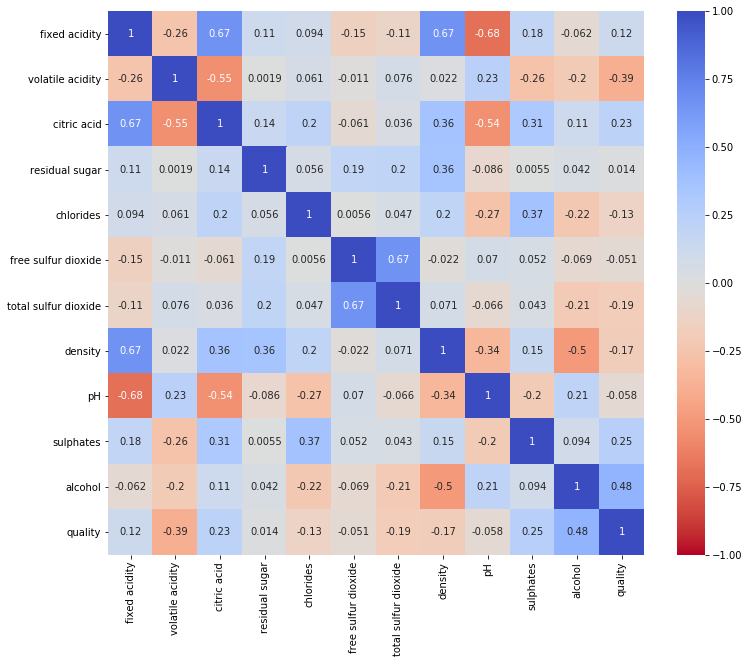

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,10))
sns.heatmap(redwine.corr(),annot=True, vmin = -1, vmax= 1, cmap="coolwarm_r")

#### 3) 분류 모형의 feature importance

In [149]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=10, random_state=10)

# , verbose=0, 이건 제일 낮게 하는 것이 좋음. 
rf_model.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [150]:
rf_model.feature_importances_

array([0.0798001 , 0.08939363, 0.07559801, 0.07040257, 0.08491992,
       0.07888842, 0.0961859 , 0.08336116, 0.07947206, 0.1001    ,
       0.16187823])

In [151]:
import numpy as np
np.sum(rf_model.feature_importances_)

1.0

In [152]:
features = pd.DataFrame(data=np.c_[X.columns, rf_model.feature_importances_], columns=["feature","importance"])

In [153]:
features.sort_values(by ="importance",ascending=False, inplace=True)
features.reset_index(drop=True, inplace = True)
features

,feature,importance
0,alcohol,0.161878
1,sulphates,0.1001
2,total sulfur dioxide,0.0961859
3,volatile acidity,0.0893936
4,chlorides,0.0849199
5,density,0.0833612
6,fixed acidity,0.0798001
7,pH,0.0794721
8,free sulfur dioxide,0.0788884
9,citric acid,0.075598


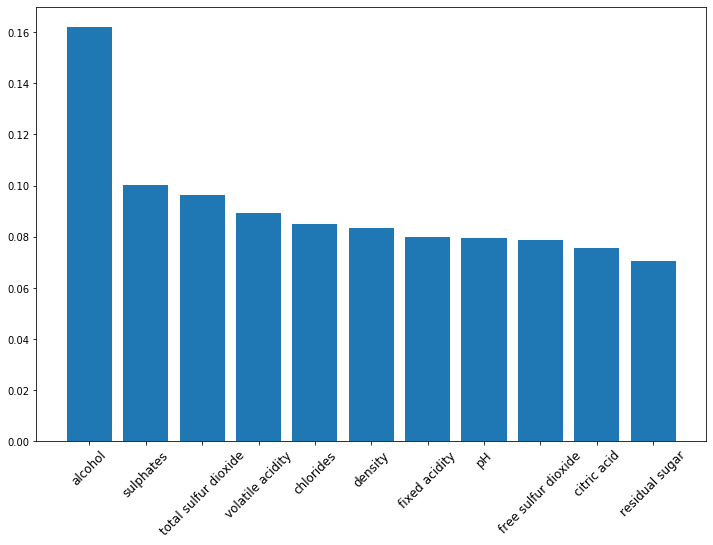

In [154]:
plt.figure(figsize=(12,8))
plt.bar(features.feature, features.importance)
plt.xticks(features.feature, fontsize= 12, rotation=45)
plt.show()

- 특징 변수들의 누적합의 그래프로 표현

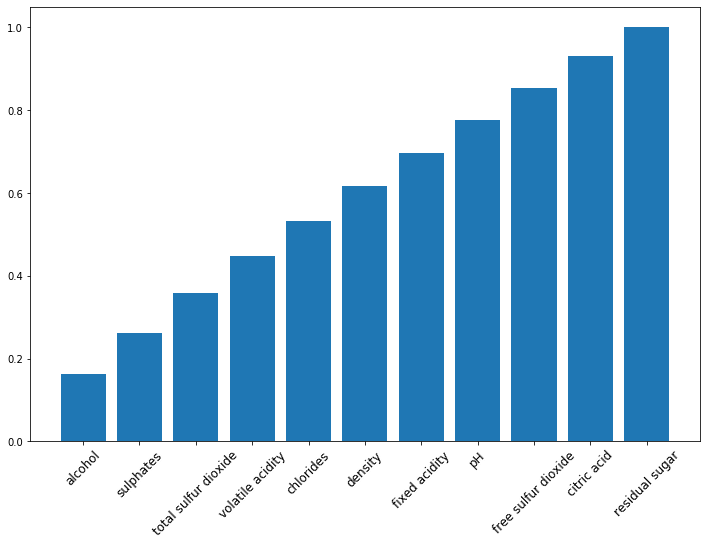

In [155]:
y_stack = np.cumsum(features.importance, axis= 0)
plt.figure(figsize=(12,8))
plt.bar(features.feature, y_stack)
plt.xticks(features.feature, fontsize= 12, rotation=45)
plt.show()

#### 4) RFE 방식

In [156]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

In [157]:
rf_model = RandomForestClassifier(n_estimators=10, random_state=10)
rfe_model = RFE(rf_model, n_features_to_select=5)
rfe_model.fit(train_X, train_y)

RFE(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                     class_weight=None, criterion='gini',
                                     max_depth=None, max_features='auto',
                                     max_leaf_nodes=None, max_samples=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=10, n_jobs=None,
                                     oob_score=False, random_state=10,
                                     verbose=0, warm_start=False),
    n_features_to_select=5, step=1, verbose=0)

In [158]:
rfe_model.get_support()

array([False,  True, False, False, False, False,  True,  True, False,
        True,  True])

In [159]:
import numpy as np
import pandas as pd
features_rfe = pd.DataFrame(data=np.c_[X.columns.values, rfe_model.get_support()],
                           columns=["feature","selected"])
features_rfe.sort_values(by="selected",ascending=False)

,feature,selected
1,volatile acidity,True
6,total sulfur dioxide,True
7,density,True
9,sulphates,True
10,alcohol,True
0,fixed acidity,False
2,citric acid,False
3,residual sugar,False
4,chlorides,False
5,free sulfur dioxide,False


In [160]:
features.merge(features_rfe)

,feature,importance,selected
0,alcohol,0.161878,True
1,sulphates,0.1001,True
2,total sulfur dioxide,0.0961859,True
3,volatile acidity,0.0893936,True
4,chlorides,0.0849199,False
5,density,0.0833612,True
6,fixed acidity,0.0798001,False
7,pH,0.0794721,False
8,free sulfur dioxide,0.0788884,False
9,citric acid,0.075598,False


#### 학습시킨 머신러닝 모형 저장

In [161]:
import pickle
with open("rfe.model","wb") as f:
    pickle.dump(rfe_model,f)

- 모형을 파일에서 불러옴

In [162]:
import pickle
with open("rfe.model","rb") as f:
    rfe_model = pickle.load(f)

In [163]:
rfe_model.predict(test_X[:10])

array([6, 5, 7, 5, 5, 5, 7, 6, 6, 5], dtype=int64)

In [164]:
test_y[:10].values

array([6, 5, 6, 5, 5, 5, 7, 5, 6, 5], dtype=int64)

### 1.4. 회귀모형의 변수 선택
- 회귀모형의 회귀계수를 이용해 여러변수중에서 유의미한 변수를 선택/추출 할 수있습니다.
- 보스턴 집값 데이터를 불러와서 유의미함 변수를 선택하는 과정을 보여줌

#### 1) 데이터 표준화

In [165]:
from sklearn.datasets import load_boston
boston = load_boston()
X  = boston.data
y = boston.target

In [169]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [170]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### 2) 회귀계수
- 회귀계수를 이용해 중요도가 높은 변수들로부터 출력함

In [171]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [172]:
lr.coef_

array([-10.16754951,   4.72203159,  -0.08347889,   2.12683005,
        -8.03113437,  20.65601498,  -2.01254247, -14.71250333,
         6.72684388,  -6.97824722,  -9.47299026,   3.24673389,
       -13.12121993])

In [173]:
import pandas as pd
import numpy as np
features = pd.DataFrame(np.c_[boston.feature_names, lr.coef_],
                       columns=['feature','coef'])

In [174]:
features.sort_values("coef", ascending=False, inplace=True)
features

,feature,coef
8,RAD,6.726843877808456
1,ZN,4.722031587164414
11,B,3.2467338879965477
5,RM,20.656014977750303
3,CHAS,2.1268300529977955
10,PTRATIO,-9.472990261164439
4,NOX,-8.03113437047869
9,TAX,-6.978247217571394
6,AGE,-2.0125424708891697
7,DIS,-14.712503333707875


### 1.5. SelectKBest
- score에 따라 k개의 특징을 선택함

In [176]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2
X,y = load_iris(return_X_y=True)
X.shape

(150, 4)

In [177]:
X_new = SelectKBest(chi2, k=1).fit_transform(X,y)
X_new.shape

(150, 1)

- 필기체 숫자 이미지의 화소 64개에서 카이제곱함수를 스코아 함수로 사용해서 가장 큰 특징을 갖는 화소 20개를 선택. 

In [178]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2

X, y = load_digits(return_X_y=True)
X.shape

(1797, 64)

In [179]:
X_new = SelectKBest(chi2, k=20).fit_transform(X,y)
X_new.shape

(1797, 20)

### 1.6 평균값 인코딩의 오버피팅 해결방법

## 2절. 파라미터 탐색과 모형 최적화
### 2.1. validation_curve

In [181]:
from sklearn.datasets import load_digits
digits=load_digits()
X,y=digits.data,digits.target

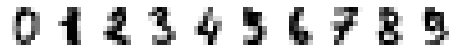

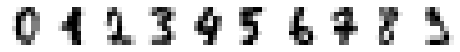

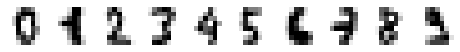

In [182]:
%matplotlib inline
import matplotlib.pyplot as plt
N=30
nrows=(N//10)

for row in range(nrows):
    plt.figure(figsize=(8,8))
    for i in range(10):
        plt.subplot(1,10,i+1)
        plt.imshow(digits.images[i+row*10],cmap=plt.cm.gray_r, interpolation='nearest')
        plt.axis('off')
    plt.show()

In [183]:
from sklearn.svm import SVC
model=SVC().fit(X,y)
model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [184]:
model.score(X,y)

0.996661101836394

In [185]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.96111111, 0.94444444, 0.98328691, 0.98885794, 0.93871866])

In [186]:
import numpy as np
param_range=np.logspace(-6,-1,10)

In [187]:
%%time
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
train_scores, test_scores= validation_curve(SVC(),X,y,param_name='gamma',
                                           param_range=param_range, cv=10,
                                           scoring='accuracy',n_jobs=1)

Wall time: 41 s


In [188]:
import numpy as np
train_scores_mean=np.mean(train_scores,axis=1)
train_scores_std=np.std(train_scores,axis=1)
test_scores_mean=np.mean(test_scores,axis=1)
test_scores_std=np.std(test_scores,axis=1)

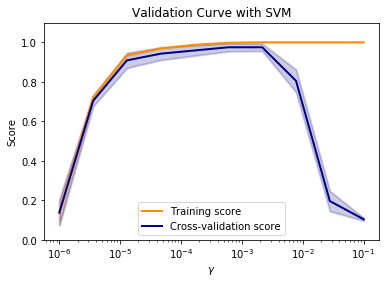

In [194]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.title('Validation Curve with SVM')
plt.xlabel('$\gamma$')
plt.ylabel('Score')
plt.ylim(0.0,1.1)
lw=2
plt.semilogx(param_range,train_scores_mean, label='Training score',
                color='darkorange',lw=lw)
plt.fill_between(param_range,train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2,
                color='darkorange',lw=lw)
plt.semilogx(param_range,test_scores_mean, label='Cross-validation score',
                color='navy',lw=lw)
plt.fill_between(param_range,test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2,
                color='navy',lw=lw)
plt.legend(loc='best')
plt.show()

In [195]:
gamma=param_range[test_scores_mean.argmax()]
from sklearn.svm import SVC
model=SVC(gamma=gamma).fit(X,y)
model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0021544346900318843,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [196]:
model.score(X,y)

0.92

In [197]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(model,X,y,cv=5))

0.9066666666666668

In [198]:
from __future__ import print_function
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

iris=load_iris()
X,y=iris.data,iris.target

In [199]:
pca=PCA(n_components=2)
selection=SelectKBest(k=1)
combined_features=FeatureUnion([('pca',pca), ('univ_select',selection)])

X_features=combined_features.fit(X,y).transform(X)

svm=SVC(kernel='linear')

In [201]:
pipeline = Pipeline([('features',combined_features),('svm',svm)])

param_grid=dict(features__pca__n_components=[1,2,3], features__univ_select__k=[1,2],
               svm__C=[0.1,1,10])

grid_search=GridSearchCV(pipeline, param_grid=param_grid, cv=5, verbose=10)
grid_search.fit(X,y)
print(grid_search.best_estimator_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1 
[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1, score=0.933, total=   0.0s
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1 
[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1, score=0.933, total=   0.0s
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1 
[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1, score=0.867, total=   0.0s
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1 
[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1, score=0.933, total=   0.0s
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1 
[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1, score=1.000, total=   0.0s
[CV] features__pca__n_components=1, fea

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s



[CV] features__pca__n_components=2, features__univ_select__k=1, svm__C=0.1 
[CV]  features__pca__n_components=2, features__univ_select__k=1, svm__C=0.1, score=1.000, total=   0.0s
[CV] features__pca__n_components=2, features__univ_select__k=1, svm__C=0.1 
[CV]  features__pca__n_components=2, features__univ_select__k=1, svm__C=0.1, score=0.867, total=   0.0s
[CV] features__pca__n_components=2, features__univ_select__k=1, svm__C=0.1 
[CV]  features__pca__n_components=2, features__univ_select__k=1, svm__C=0.1, score=0.933, total=   0.0s
[CV] features__pca__n_components=2, features__univ_select__k=1, svm__C=0.1 
[CV]  features__pca__n_components=2, features__univ_select__k=1, svm__C=0.1, score=1.000, total=   0.0s
[CV] features__pca__n_components=2, features__univ_select__k=1, svm__C=1 
[CV]  features__pca__n_components=2, features__univ_select__k=1, svm__C=1, score=0.967, total=   0.0s
[CV] features__pca__n_components=2, features__univ_select__k=1, svm__C=1 
[CV]  features__pca__n_compon

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.3s finished


In [202]:
model = grid_search.best_estimator_

In [207]:
pred = model.predict(X)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [208]:
import pandas as pd
ct =pd.crosstab(y, pred, rownames=['True'],colnames=['Pred'], margins=True)
print(ct)

Pred   0   1   2  All
True                 
0     50   0   0   50
1      0  46   4   50
2      0   0  50   50
All   50  46  54  150


### 2.3. ParameterGrid

In [210]:
from sklearn.model_selection import ParameterGrid
param_grid = {'a':[1,2] ,'b':[True, False]}
list(ParameterGrid(param_grid))

[{'a': 1, 'b': True},
 {'a': 1, 'b': False},
 {'a': 2, 'b': True},
 {'a': 2, 'b': False}]

In [211]:
param_grid = [{'kernel': ['linear']},
             {'kernel': ['rbf'], 'gamma':[1,10]}]
list(ParameterGrid(param_grid))

[{'kernel': 'linear'},
 {'gamma': 1, 'kernel': 'rbf'},
 {'gamma': 10, 'kernel': 'rbf'}]

In [212]:
ParameterGrid(grid)[1]

NameError: name 'grid' is not defined

### 2.4. 병렬처리

In [213]:
%%time 
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
train_csores, test_scores = validation_curve(
    SVC(), X, y, param_name='gamma', param_range=param_range,
    cv = 10, scoring="accuracy", n_jobs= 1)

Wall time: 196 ms


- n_jobs 를 4로 바꿈

In [215]:
%%time 
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
train_csores, test_scores = validation_curve(
    SVC(), X, y, param_name='gamma', param_range=param_range,
    cv = 10, scoring="accuracy", n_jobs= 4)

Wall time: 731 ms


### 2.5. Pipeline 과 GridSearchCV를 이용한 차원감소

- gridsearchcv 와 함께 파이프라인을 사용하는 방법

In [216]:
%%time
from __future__ import print_function, division
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA, NMF
from sklearn.feature_selection import SelectKBest, chi2

pipe = Pipeline([
    #  the reduce_dim stage is populated by the param_grid
    ("reduce_dim", None)
    ("classify", LinearSVC)
])

TypeError: 'tuple' object is not callable